# **Cyclistic Case-Study**
#### **Author:** *Mohammed Mustafa* 
#### **Date:** *14/4/2023*
![](https://miro.medium.com/v2/resize:fit:1104/0*Dgkc35WIkcAVHbMC.jpg)

# **Introduction**

### **Project Scenario**
I am a junior data analyst working in the marketing analyst team at Cyclistic, a fictional bike-share company in Chicago. The director
of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,
my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights,
my team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives
must approve my recommendations, so they must be backed up with compelling data insights and professional data
visualizations

### **Characters and teams**
* **Cyclistic:** A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

* **Lily Moreno:** The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.

* **Cyclistic marketing analytics team:** A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.

* **Cyclistic executive team:** The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

# **Ask** 
The finance department at Cyclistic has determined that annual members are more profitable than casual riders so Mr. Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members and has assigned me with answering the following question **“How do annual members and casual riders use Cyclistic bikes differently ?”**

# **Prepare**
To answer this question I will use the data of the preivous 12 months ( between April 2022 to March 2023 ) of Cyclistic's historical trip to answer the question (Note: Because Cyclistic is a ﬁctional company I will use a public data for a real company. For the purposes of this case study, the datasets are appropriate and will enable me to answer the business questions. The data has been made available by Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement))

You can download the data from [here](https://divvy-tripdata.s3.amazonaws.com/index.html) or download it from my kaggle account.

#### **Approach:**

##### Download the data
##### Merge all files into a data frame

In [5]:
# Import needed libraries
library('readr')
library('readxl')
library('tidyverse')
library('ggplot2')
library('patchwork')
library('stringr')
library('scales')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ purrr     1.0.1
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [6]:
data_integration <- function(path){
    # Combine all the csv files from a specific direcotry into a single dataframe
    # Args:
    #   path[char]: the path of the directory in my computer
    # Returns:
    #   data[data.frame]: data frame includes all the data

    # Merge the data
    data1 = list.files(path, full.names=TRUE, pattern='*.csv')  %>%  
    lapply(read_csv)  %>% 
    bind_rows

    data2 = list.files(path, full.names=TRUE, pattern='*.xlsx')  %>%  
    lapply(read_excel)  %>% 
    bind_rows

    data = bind_rows(data1, data2)

    # Check the the merged data

    return (data)
}

data = data_integration('/kaggle/input/cyclistic-uncleaned-data')

head(data)
paste('Number of rows:', nrow(data))

Rows: 371249 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 634858 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 769204 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3564070EEFD12711,electric_bike,2022-04-06 17:42:48,2022-04-06 17:54:36,Paulina St & Howard St,515,University Library (NU),605,42.01913,-87.67353,42.05294,-87.67345,member
0B820C7FCF22F489,classic_bike,2022-04-24 19:23:07,2022-04-24 19:43:17,Wentworth Ave & Cermak Rd,13075,Green St & Madison St,TA1307000120,41.85308,-87.63193,41.88189,-87.64879,member
89EEEE32293F07FF,classic_bike,2022-04-20 19:29:08,2022-04-20 19:35:16,Halsted St & Polk St,TA1307000121,Green St & Madison St,TA1307000120,41.87184,-87.64664,41.88189,-87.64879,member
84D4751AEB31888D,classic_bike,2022-04-22 21:14:06,2022-04-22 21:23:29,Wentworth Ave & Cermak Rd,13075,Delano Ct & Roosevelt Rd,KA1706005007,41.85308,-87.63193,41.86749,-87.63219,casual
5664BCF0D1DE7A8B,electric_bike,2022-04-16 15:56:30,2022-04-16 16:02:11,Halsted St & Polk St,TA1307000121,Clinton St & Madison St,TA1305000032,41.87181,-87.64657,41.88224,-87.64107,member
AA9EB7BD2E1FC128,classic_bike,2022-04-21 16:52:33,2022-04-21 16:56:51,Desplaines St & Randolph St,15535,Canal St & Adams St,13011,41.88462,-87.64457,41.87926,-87.63990,member


[1] "Number of rows: 5803720"

#### **Stage Summary:**

##### Merged 12 files into a dataframe which includes 13 variables and 5,803,720 observations:


##### **ride_id:** id of each trip

##### **rideable_type:** type of bike

##### **started_at:** the time the trip started

##### **ended_at:** the time the trip ended

##### **start_station_name:** the name of the bike station at which the trip started

##### **start_station_id:** id of the station at which the trip started

##### **end_station_name:** the name of the bike station at which the trip ended

##### **end_station_id:** id of the station at which the trip ended

##### **start_lat:** latitude of the station at which the trip started

##### **start_lng:** longitude of the station at which the trip started

##### **end_lat:** latitude of the station at which the trip ended

##### **end_lng:** longitude of the station at which the trip ended

##### **member_casual:** type of user who completed the trip


# **Pre-Processing** 
In this stage, I will make the data ready for the **Analyze** stage.

#### **Approach**:

##### Add variables

##### Assess quality of data and completeness in preparation for analysis using standard data quality dimensions:
* Correct Values -> Accuracy
* Data Fields with Values -> Completeness
* Values Free from Contradiction -> Consistency
* Values up to Date -> Currency
* Data Items with Value Meta-data -> Relavency
* Data Containing Allowable Values -> Validity
* Recorded that are Duplicated -> Uniqueness 

##### Clean The data after assessment of data quality:
* Select needed columns for answering the question
* Fix any issues in the data 

#### Add variables into the dataframe

In [7]:
# Create ride_length and day_of_week columns
data = data %>% mutate(ride_length_mins = round(difftime(ended_at, started_at, units='mins'), 2),
                       time = format(as.POSIXct(started_at), format = "%H"),
                       day_of_week = weekdays(data$started_at),
                       month = months(data$started_at))

data$ride_length_mins = as.double(str_split_fixed(data$ride_length_mins, ' ',1))

#### Assessment of data quality

In [8]:
# Data Structure checking
glimpse(data)

Rows: 5,803,720
Columns: 17
$ ride_id            <chr> "3564070EEFD12711", "0B820C7FCF22F489", "89EEEE3229…
$ rideable_type      <chr> "electric_bike", "classic_bike", "classic_bike", "c…
$ started_at         <dttm> 2022-04-06 17:42:48, 2022-04-24 19:23:07, 2022-04-…
$ ended_at           <dttm> 2022-04-06 17:54:36, 2022-04-24 19:43:17, 2022-04-…
$ start_station_name <chr> "Paulina St & Howard St", "Wentworth Ave & Cermak R…
$ start_station_id   <chr> "515", "13075", "TA1307000121", "13075", "TA1307000…
$ end_station_name   <chr> "University Library (NU)", "Green St & Madison St",…
$ end_station_id     <chr> "605", "TA1307000120", "TA1307000120", "KA170600500…
$ start_lat          <dbl> 42.01913, 41.85308, 41.87184, 41.85308, 41.87181, 4…
$ start_lng          <dbl> -87.67353, -87.63193, -87.64664, -87.63193, -87.646…
$ end_lat            <dbl> 42.05294, 41.88189, 41.88189, 41.86749, 41.88224, 4…
$ end_lng            <dbl> -87.67345, -87.64879, -87.64879, -87.63219, -87.641…
$ member_cas

In [9]:
# Accuracy and Validity checking
summary(data)

   ride_id          rideable_type        started_at                 
 Length:5803720     Length:5803720     Min.   :2022-04-01 00:01:48  
 Class :character   Class :character   1st Qu.:2022-06-18 23:27:00  
 Mode  :character   Mode  :character   Median :2022-08-13 11:37:32  
                                       Mean   :2022-08-25 07:04:52  
                                       3rd Qu.:2022-10-14 18:04:21  
                                       Max.   :2023-03-31 23:59:28  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2022-04-01 00:02:15   Length:5803720     Length:5803720    
 1st Qu.:2022-06-18 23:51:55   Class :character   Class :character  
 Median :2022-08-13 12:00:07   Mode  :character   Mode  :character  
 Mean   :2022-08-25 07:23:51                                        
 3rd Qu.:2022-10-14 18:19:10                                        
 Max.   :2023-04-03 11:41:11      

In [10]:
# Consistency checking
for (col in c('rideable_type', 'member_casual')){
        print(table(data[col]))
    }


 classic_bike   docked_bike electric_bike 
      2639559        173747       2990414 

 casual  member 
2337439 3466281 


In [11]:
# Compelteness checking
paste('Number of missing values')
lapply(data, function(x) sum(is.na(x)))

[1] "Number of missing values"

$ride_id
[1] 0

$rideable_type
[1] 0

$started_at
[1] 0

$ended_at
[1] 0

$start_station_name
[1] 839082

$start_station_id
[1] 839214

$end_station_name
[1] 896319

$end_station_id
[1] 896460

$start_lat
[1] 0

$start_lng
[1] 0

$end_lat
[1] 5855

$end_lng
[1] 5855

$member_casual
[1] 0

$ride_length_mins
[1] 0

$time
[1] 0

$day_of_week
[1] 0

$month
[1] 0

In [12]:
# Uniqueness checking
paste('Number of duplicates in the data: ', sum(duplicated(data$ride_id)))

[1] "Number of duplicates in the data:  0"

In [13]:
# Adjust the size of plots in the notebook
options(repr.plot.width=16, repr.plot.height=8)

# Theme of all graphs
theme = theme(plot.title = element_text(size=25, face='bold', hjust = .5),
            plot.subtitle = element_text(size=20),
            axis.text = element_text(size=20),
            axis.title = element_text(size=20),
            legend.text = element_text(size=20),
            legend.title = element_text(size=20))

pie_theme = theme_classic() + theme(axis.line = element_blank(),
                                   axis.text = element_blank(),
                                   axis.title = element_blank(),
                                   axis.ticks = element_blank(),
                                   plot.title = element_text(size=25, face='bold', hjust = 0.5), 
                                   legend.title = element_text(size=25),
                                   legend.text = element_text(size=20))


# Function to get the colors of the graph
colors = function(red, yellow, green, blue){
    colors = c(rep('#DB4437', red), rep('#F4B400', yellow), rep('#0F9D58', green), rep('#4285F4', blue))
    return(colors)}

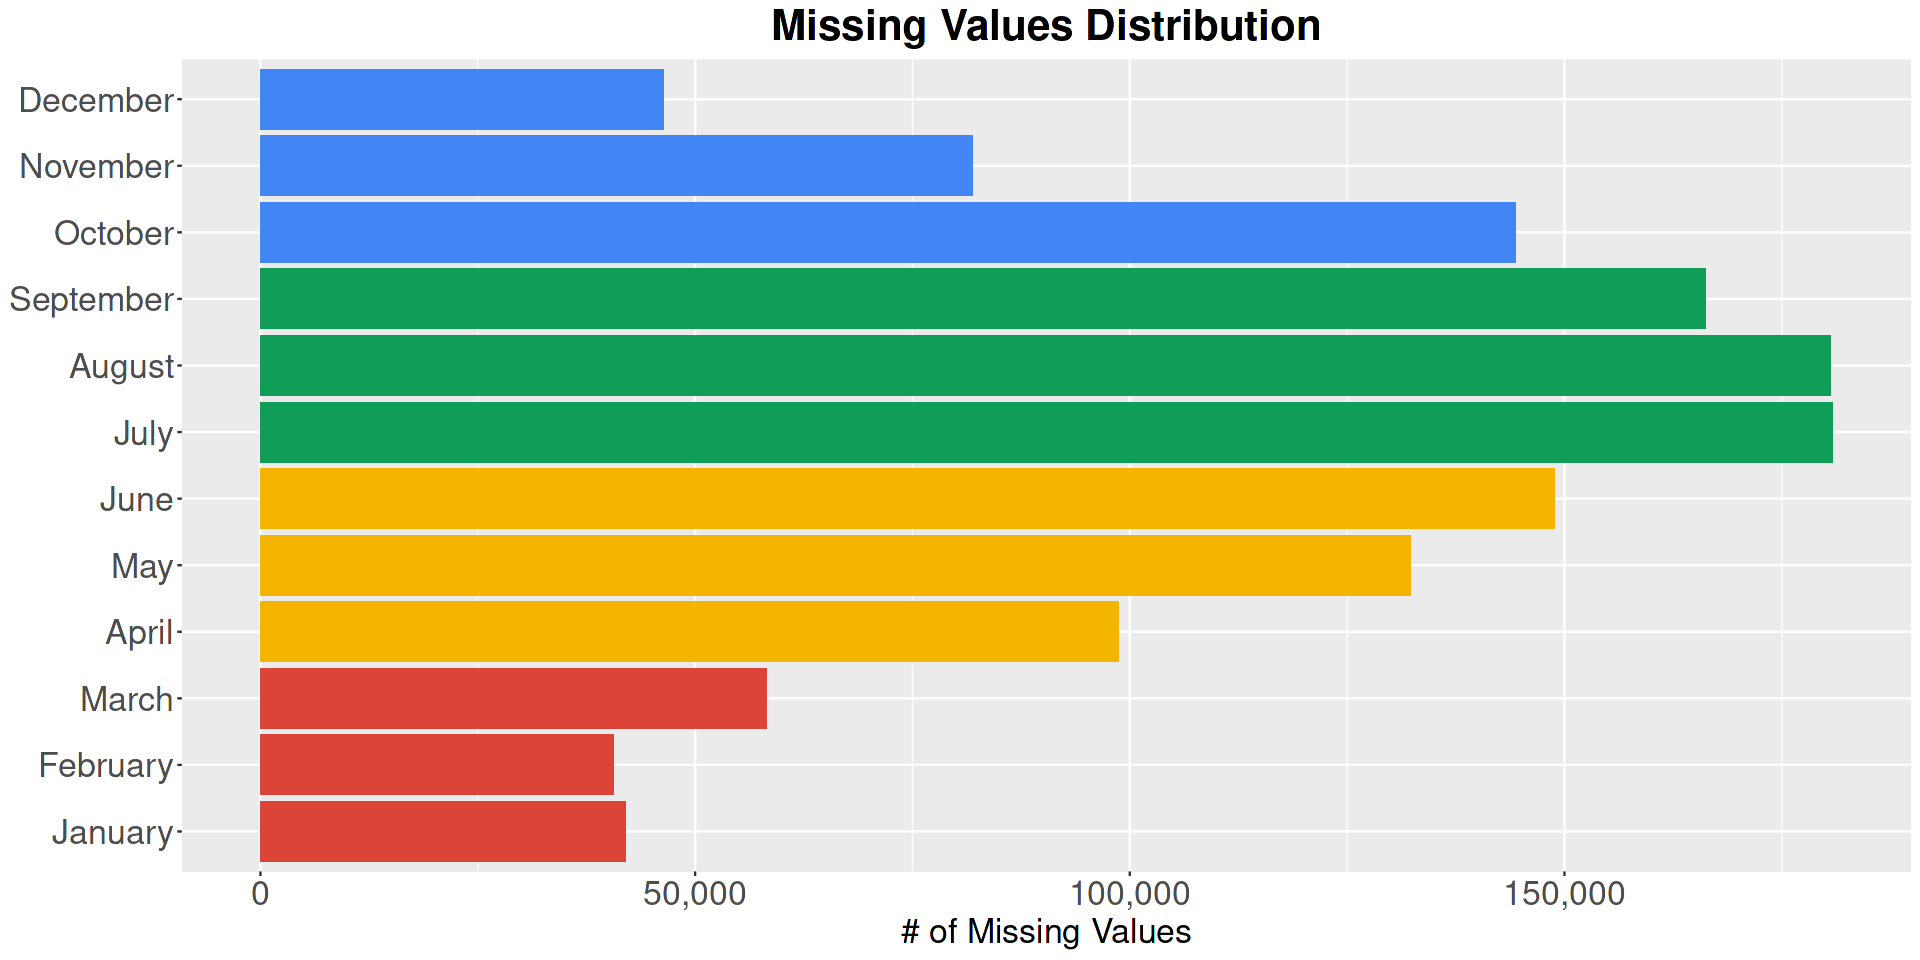

In [14]:
# Order the months 
data$month = ordered(data$month, 
                    levels=c('January', 'February', 'March', 'April', 'May', 'June','July',
                             'August', 'September', 'October', 'November', 'December'))


# Get the rows with missing values in start_station_name and end_station_name
temp = filter(data[c('start_station_name', 'end_station_name', 'month')], 
            is.na(data$start_station_name) | is.na(data$end_station_name)) %>%
            group_by(month) %>%
            summarise(count=n())

# Bar Chart
ggplot(temp, aes(y=month, x=count)) + 
geom_col(fill=colors(3, 3, 3, 3)) + 
theme + theme(axis.title.y=element_blank()) +
ggtitle('Missing Values Distribution') + 
scale_x_continuous(name="# of Missing Values", labels=comma)

#### All other values can be repeated. Maybe two customers have the same data, but it's impossible that two rides have same ID in the database so I checked the duplicates using ride_id.

In [15]:
paste('Number of duplicates in the data')
sum(duplicated(data$ride_id))

[1] "Number of duplicates in the data"

[1] 0

#### Data Wrangling

In [16]:
# Select needed columns for answering the question
data = subset(data, select = -c(ride_id, start_station_id, end_station_id, started_at, ended_at))

In [17]:
# Remove all missing values in data
data = na.omit(data)

##### when I observed that some values in ride length were negative and this impossible because there is no length in negative, I had two choices remove them or assume that the started_at value are accidentally replaced by ended_at value and vice versa for ended_at.So when i subtracted started_at from ended_at I already subtracted ended_at from started_at and this gave me negative value and i fixed that by multiply the result of subtraction by -1

##### 3-5 = -2
##### -2*-1 = 2 = 5-3


In [18]:
# Replace all negtive values in ride_length variable to possitive
data$ride_length_mins[data$ride_length_mins < 0] = data$ride_length_mins[data$ride_length_mins < 0] * -1

In [19]:
# Compelteness checking after cleaning
paste('Number of missing values after cleaning')
lapply(data, function(x) sum(is.na(x)))

[1] "Number of missing values after cleaning"

$rideable_type
[1] 0

$start_station_name
[1] 0

$end_station_name
[1] 0

$start_lat
[1] 0

$start_lng
[1] 0

$end_lat
[1] 0

$end_lng
[1] 0

$member_casual
[1] 0

$ride_length_mins
[1] 0

$time
[1] 0

$day_of_week
[1] 0

$month
[1] 0

In [20]:
# Show the cleaned data
head(data)

rideable_type,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_mins,time,day_of_week,month
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<ord>
electric_bike,Paulina St & Howard St,University Library (NU),42.01913,-87.67353,42.05294,-87.67345,member,11.80,17,Wednesday,April
classic_bike,Wentworth Ave & Cermak Rd,Green St & Madison St,41.85308,-87.63193,41.88189,-87.64879,member,20.17,19,Sunday,April
classic_bike,Halsted St & Polk St,Green St & Madison St,41.87184,-87.64664,41.88189,-87.64879,member,6.13,19,Wednesday,April
classic_bike,Wentworth Ave & Cermak Rd,Delano Ct & Roosevelt Rd,41.85308,-87.63193,41.86749,-87.63219,casual,9.38,21,Friday,April
electric_bike,Halsted St & Polk St,Clinton St & Madison St,41.87181,-87.64657,41.88224,-87.64107,member,5.68,15,Saturday,April
classic_bike,Desplaines St & Randolph St,Canal St & Adams St,41.88462,-87.64457,41.87926,-87.63990,member,4.30,16,Thursday,April


#### **Stage Summary:**

##### - There are over 800K rows with missing values related to start/end station names

##### - There are negative values in ride_length column and that's impossible

##### - Removed all rows with missing values in start_station_name or end_station_name variables

##### - Select needed columns

##### - Replace all negetive values in the ride_length to possitive


## **--------------- NOW THE DATA IS PREPARED FOR ANALYSIS ---------------**

# Analyze
After I prepared and processed the data I'll explore the two groups (annual_memberships, casual_riders) to understand how memberships and casuals use Cyclistic bikes differently.

#### **Approach:**

##### Find out the percentage of each group of total trips

##### Find out preferred types of bikes

##### Find out which weekdays have high demand and which ones have low demand

##### Find out which start/end stations are most used

##### Find out five number summary of ride length

##### Find out which months have high demand and which ones have low demand

##### Find out which daily times have high demand and which ones have low demand

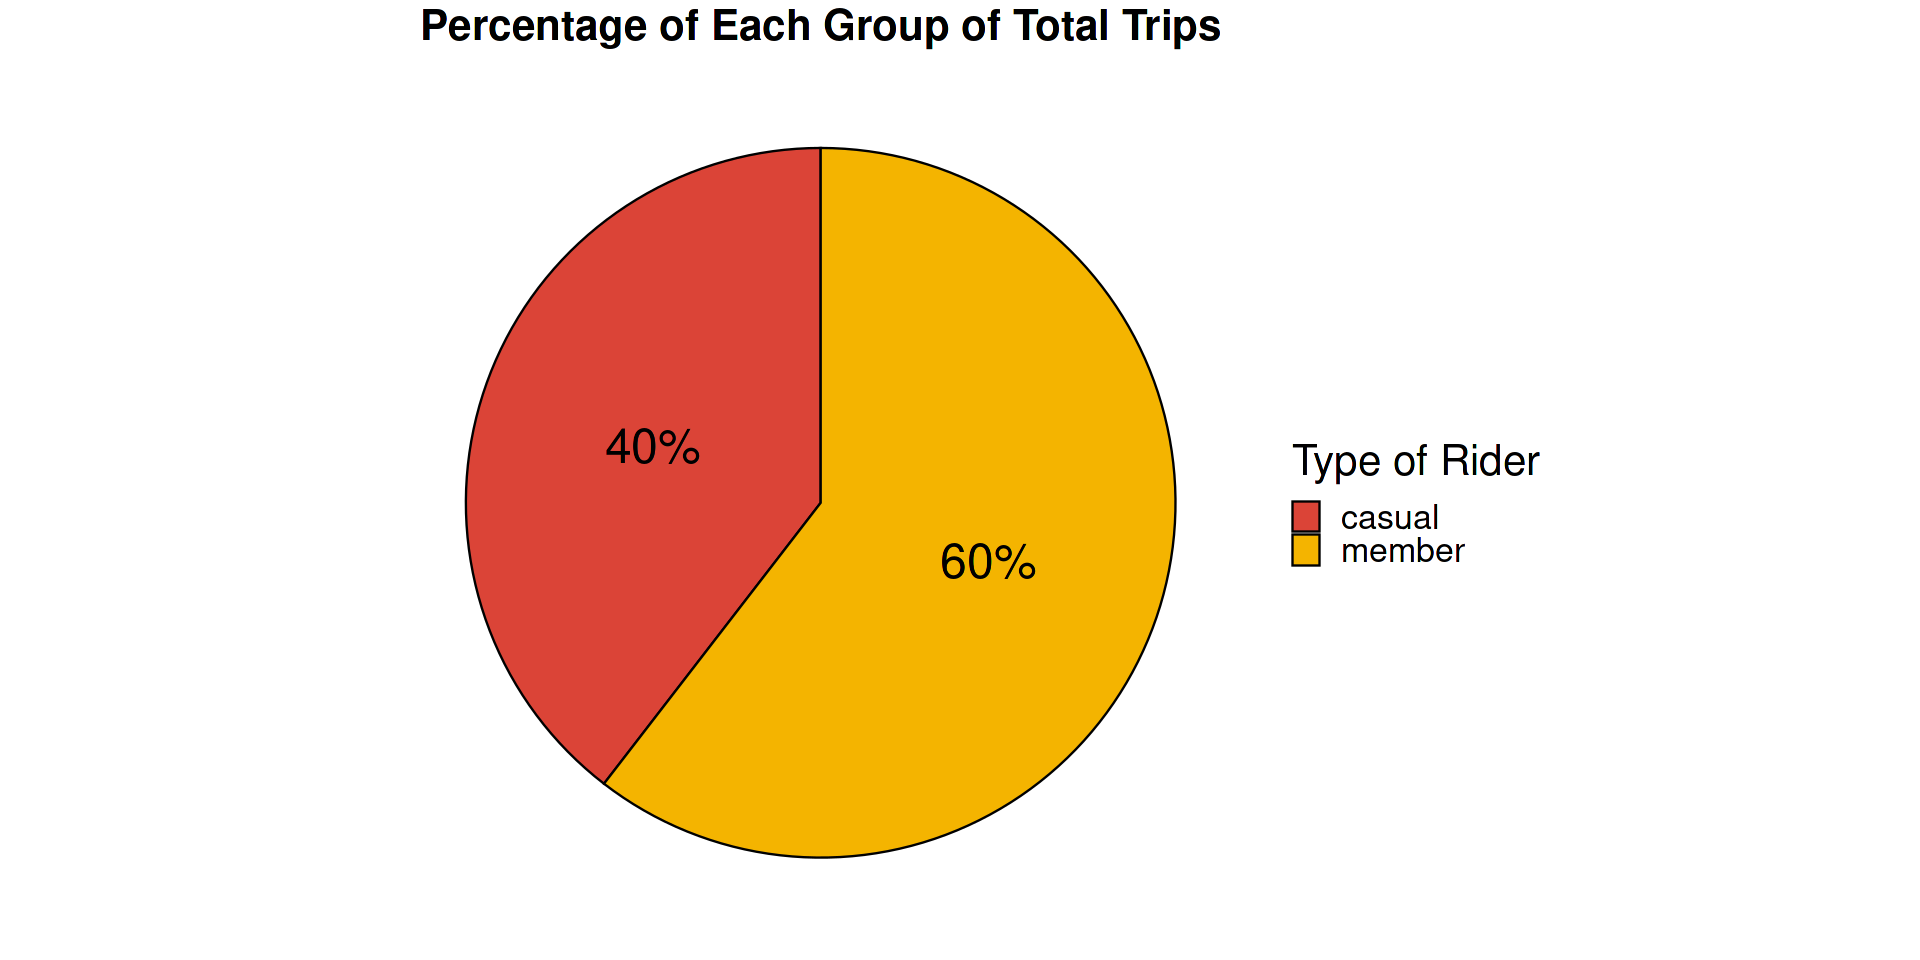

In [21]:
# Pie Chart
temp = data %>% 
group_by(member_casual) %>% 
summarise(count = n())
percentiles = geom_text(aes(label = paste0(round(count*100/sum(count),0), "%")), size=10, position = position_stack(vjust = 0.5))

ggplot(temp, aes(x='', y=count, fill=member_casual)) + 
geom_bar(stat="identity", width=1, color='black') +
coord_polar("y", start=0) + percentiles + pie_theme +
scale_fill_manual("Type of Rider", values=colors(1, 1, 0, 0)) +
labs(title = "Percentage of Each Group of Total Trips")

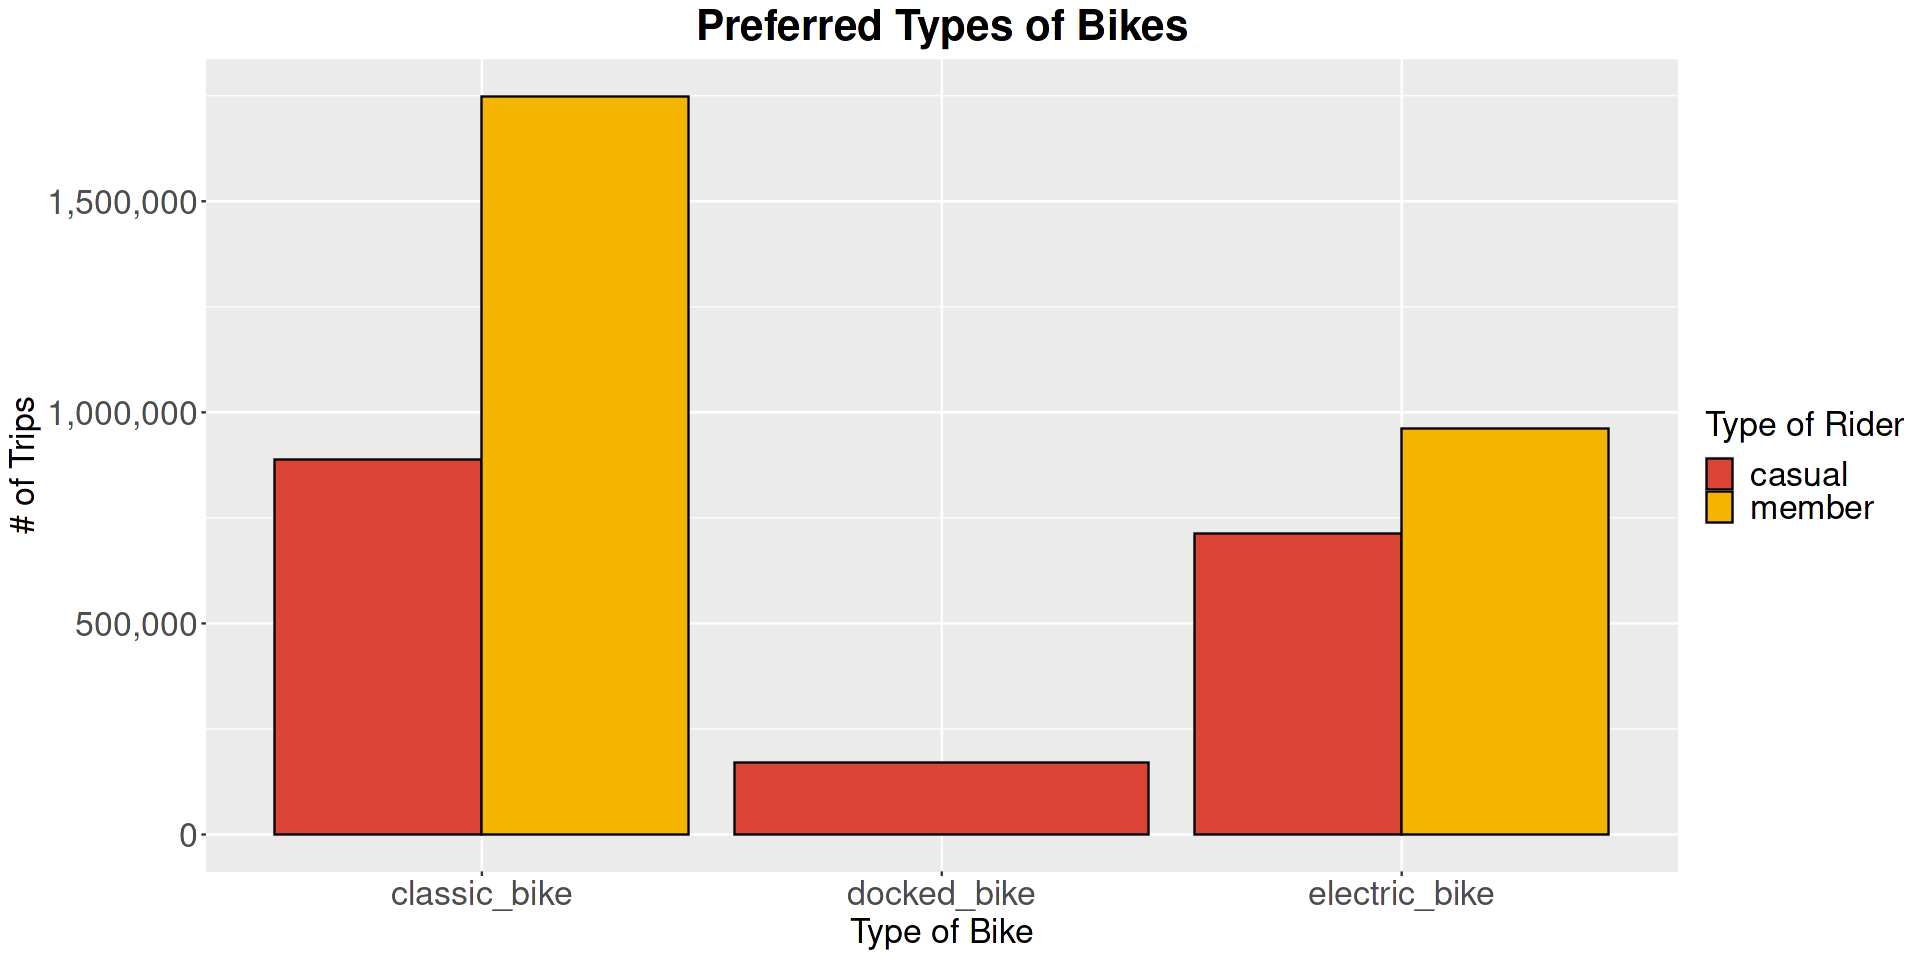

In [22]:
# Column Chart
temp = data %>%
group_by(member_casual, rideable_type) %>%
summarise(.groups = 'drop', count=n()) 

ggplot(temp, aes(fill=member_casual, x=rideable_type, y=count)) +
geom_col(position='dodge', color='black') +
scale_fill_manual("Type of Rider", values=colors(1, 1, 0, 0)) +
theme + 
ggtitle('Preferred Types of Bikes') + 
xlab('Type of Bike') + 
scale_y_continuous(name='# of Trips', labels=comma)

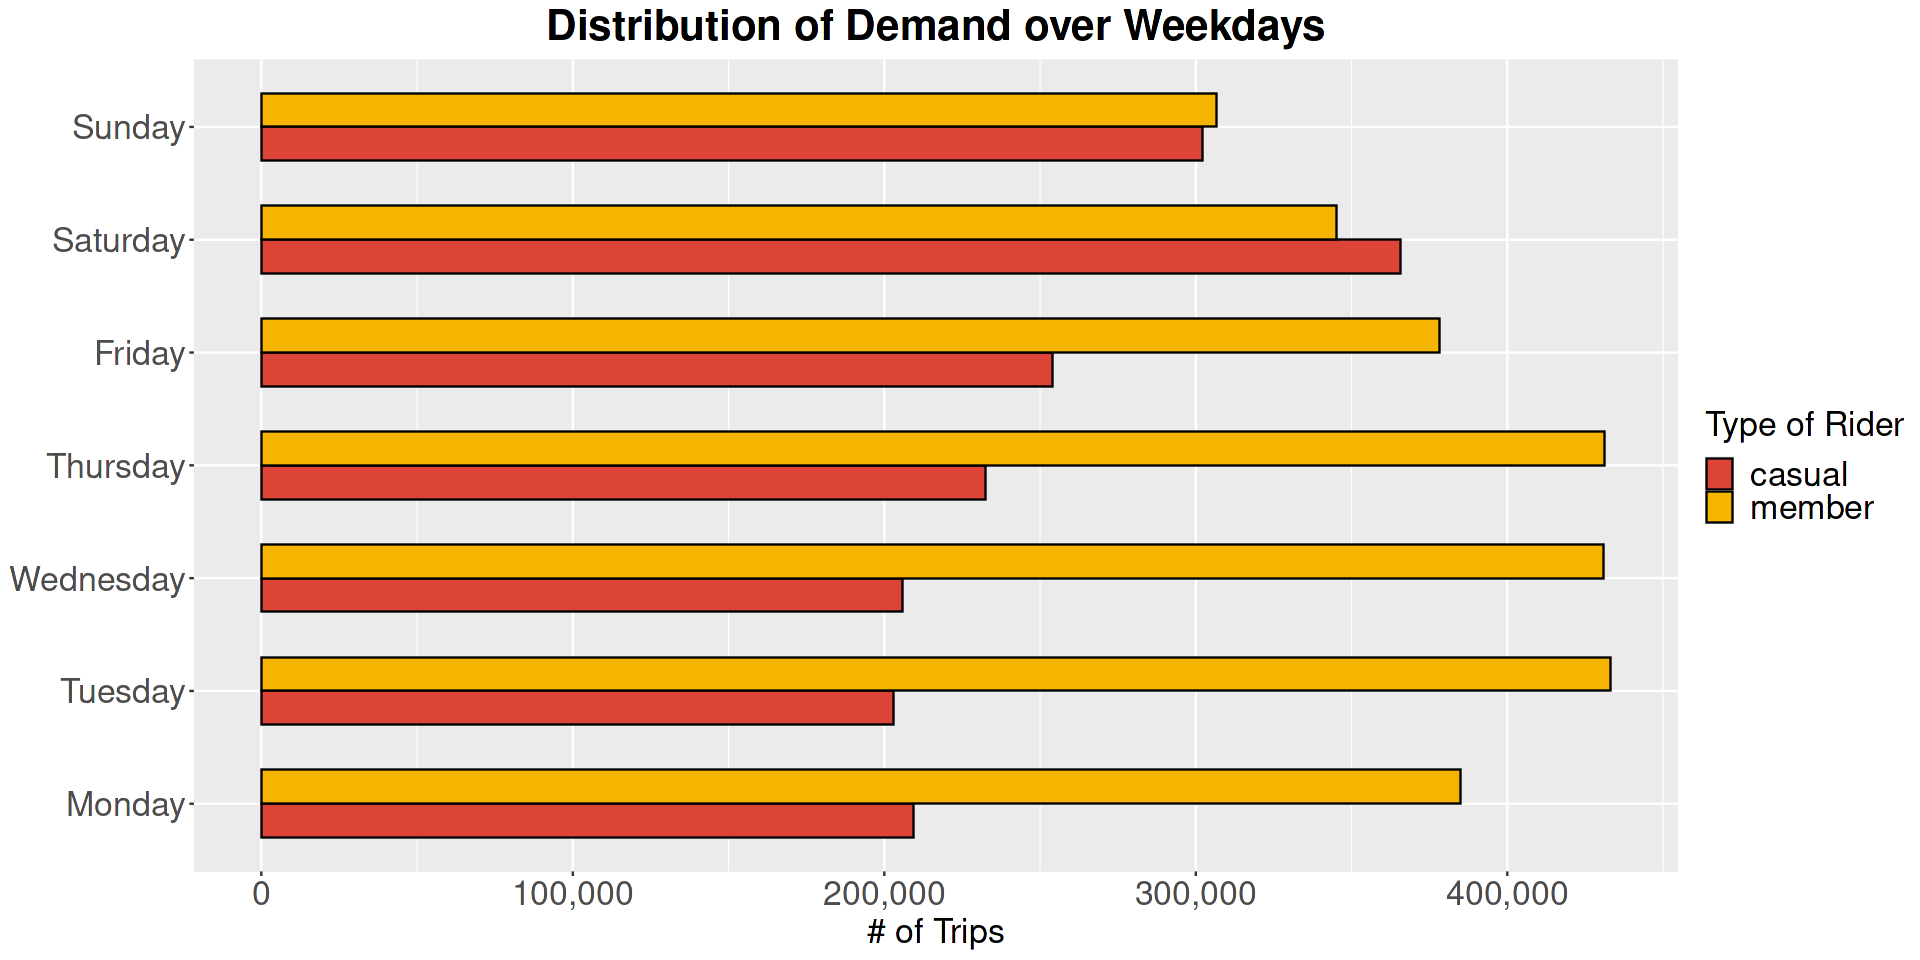

In [23]:
# bar_chart
ordered_days = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
data$day_of_week = ordered(data$day_of_week, levels=ordered_days)

temp = data %>% 
group_by(member_casual, day_of_week) %>%
summarise(.groups='drop', count=n())

ggplot(temp, aes(fill=member_casual, x=count, y=day_of_week, width=.6)) + 
geom_col(position='dodge', color='black') +
scale_fill_manual("Type of Rider", values=colors(1, 1, 0, 0)) + 
theme + 
theme(axis.title.y = element_blank()) + 
ggtitle('Distribution of Demand over Weekdays') + 
scale_x_continuous(name='# of Trips', labels=comma)

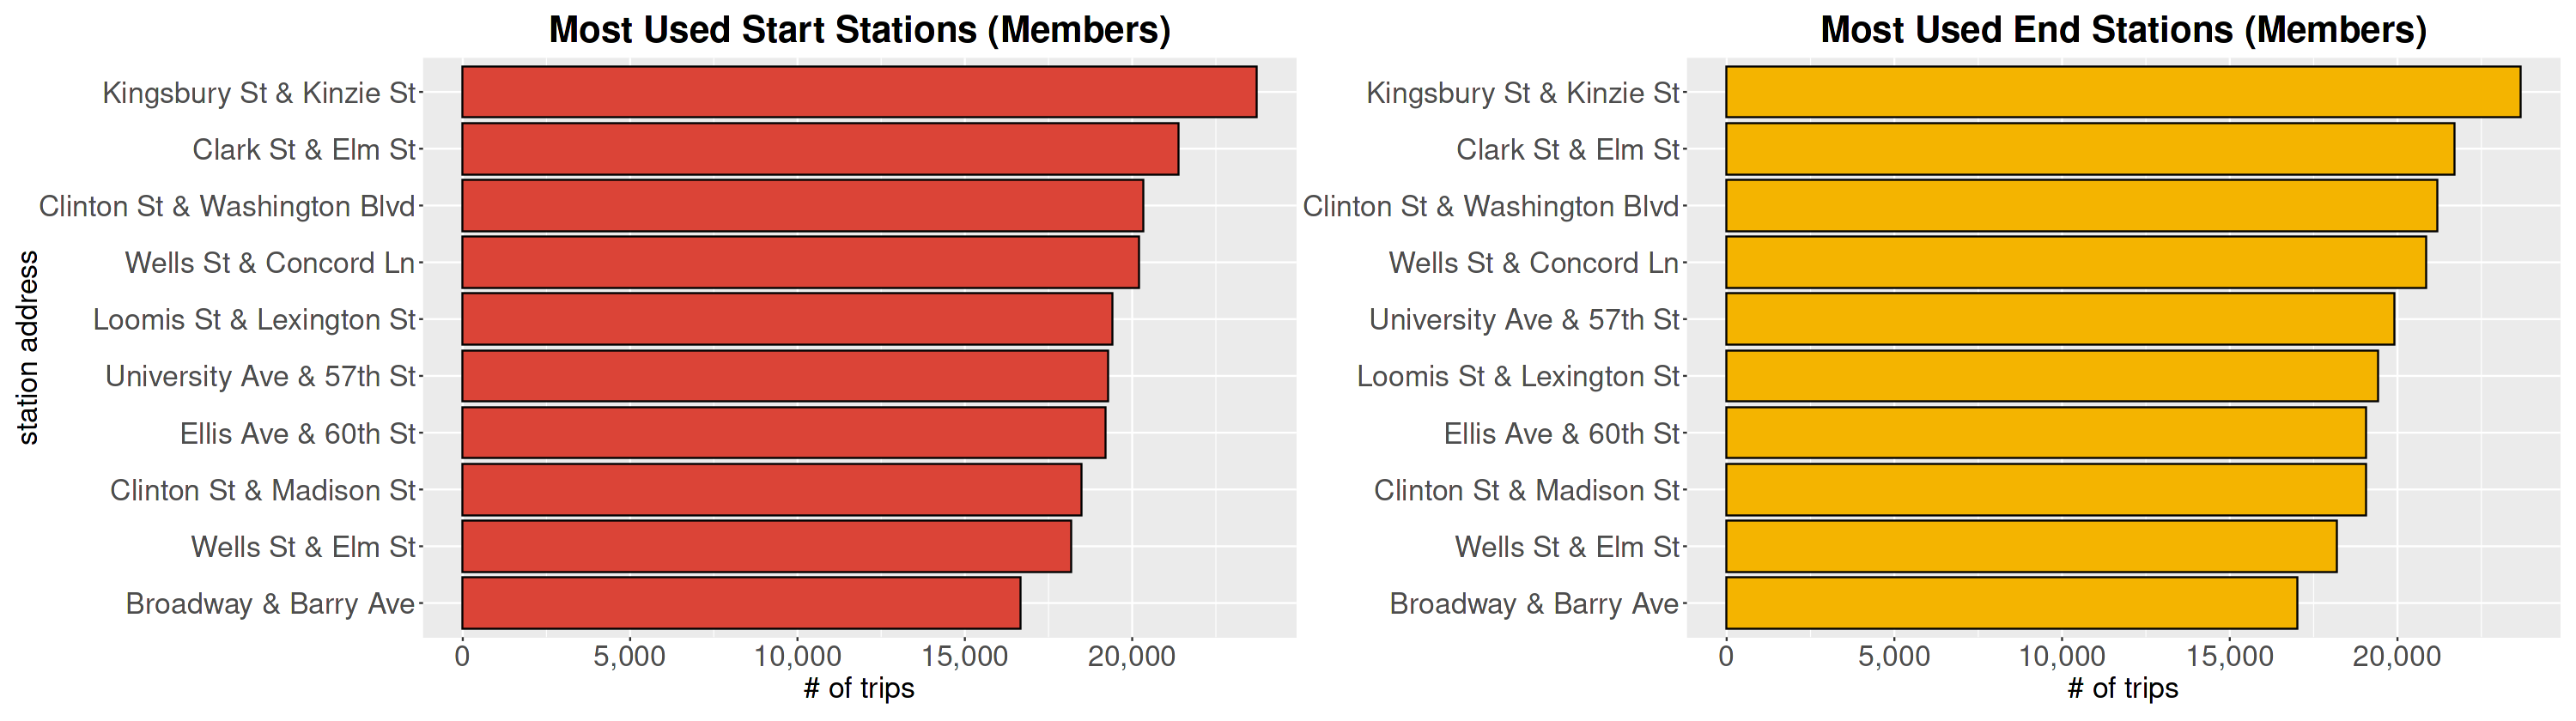

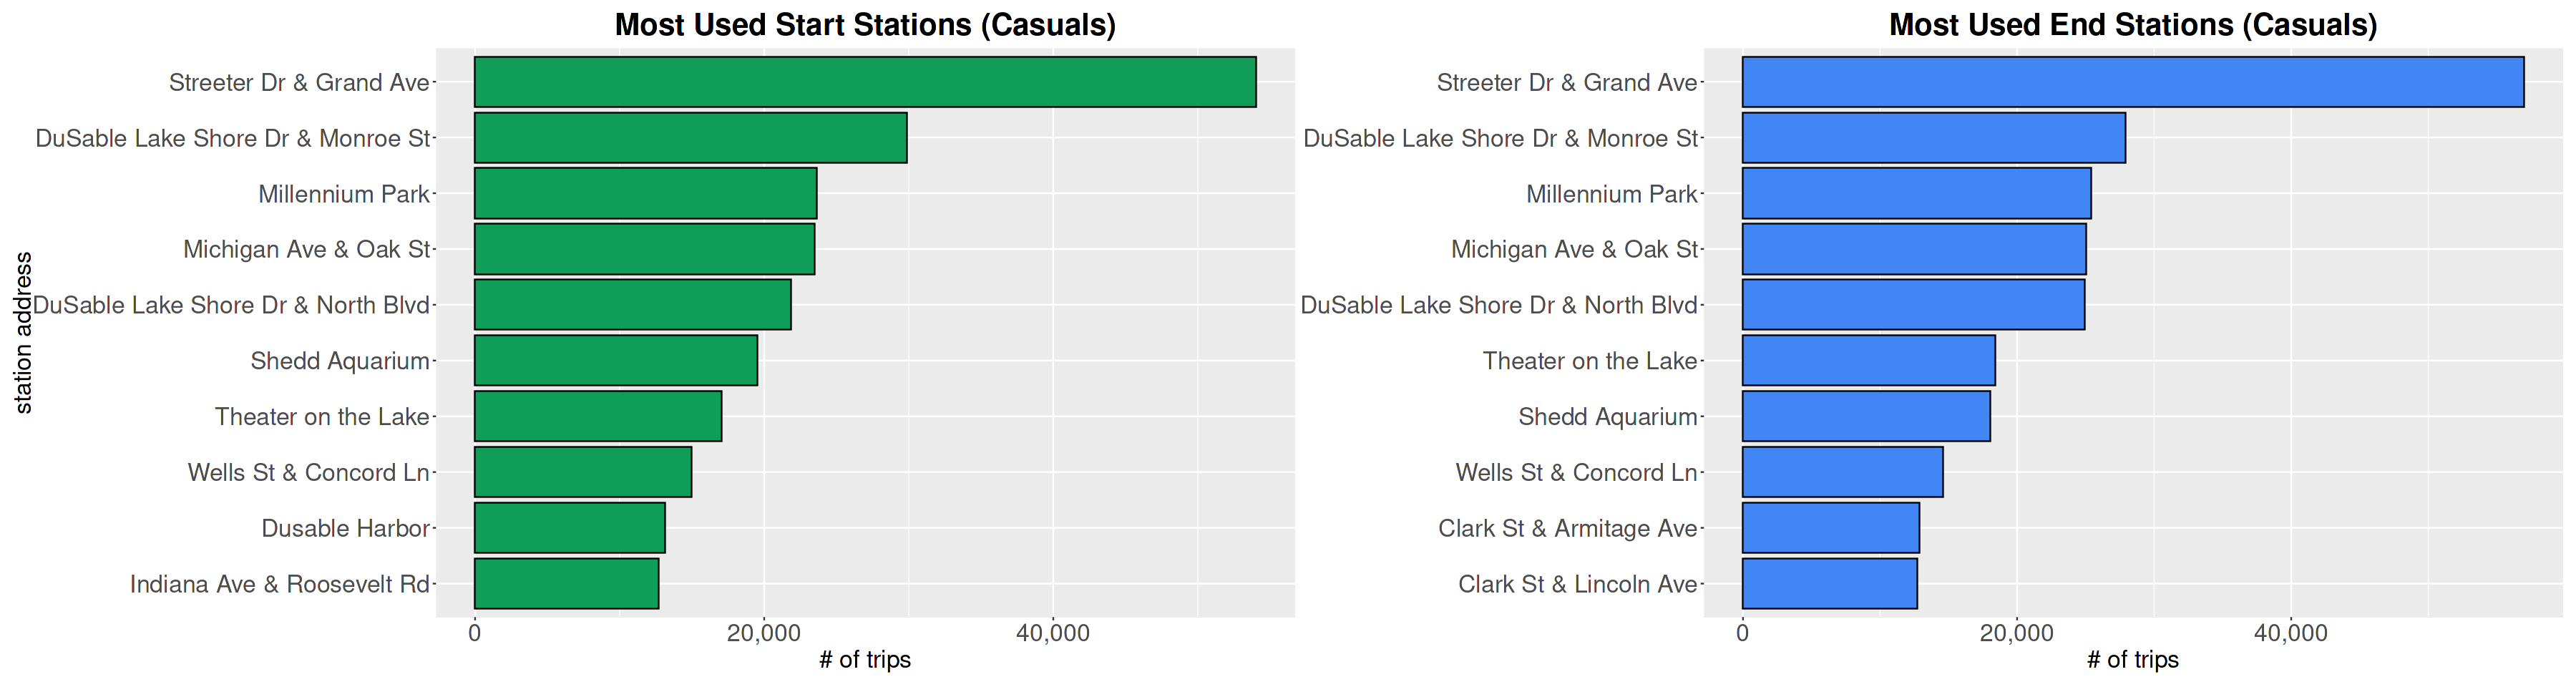

In [24]:
options(repr.plot.width=25, repr.plot.height=7)

start1 = data %>% 
filter(member_casual=='member') %>%
group_by(start_station_name) %>%
summarise(count=n()) %>%
arrange(-count) %>%
head(10)


end1 = data %>%
filter(member_casual=='member') %>%
group_by(end_station_name) %>%
summarise(count=n()) %>%
arrange(-count) %>%
head(10)

start2 = data %>%
filter(member_casual=='casual') %>%
group_by(start_station_name) %>%
summarise(count=n()) %>%
arrange(-count) %>%
head(10)

end2 = data %>%
filter(member_casual=='casual') %>%
group_by(end_station_name) %>%
summarise(count=n()) %>%
arrange(-count) %>%
head(10)

# Bar Charts (Members)
ggplot(start1, aes(x=count, y=reorder(start_station_name, count))) + 
geom_col(color='black', fill=colors(10, 0, 0, 0)) +
theme + 
ggtitle('Most Used Start Stations (Members)') + 
scale_x_continuous(name='# of trips', labels=comma) + 
ylab('station address') +

ggplot(end1, aes(x=count, y=reorder(end_station_name, count))) + 
geom_col(color='black', fill=colors(0, 10, 0, 0)) +
theme + 
ggtitle('Most Used End Stations (Members)') + 
scale_x_continuous(name='# of trips', labels=comma) + 
theme(axis.title.y=element_blank())

# Bar Charts (Casuals)
options(repr.plot.width=30, repr.plot.height=8)
ggplot(start2, aes(x=count, y=reorder(start_station_name, count))) + 
geom_col(color='black', fill=colors(0, 0, 10, 0)) +
theme + 
ggtitle('Most Used Start Stations (Casuals)') + 
scale_x_continuous(name='# of trips', labels=comma) + 
ylab('station address') +

ggplot(end2, aes(x=count, y=reorder(end_station_name, count))) + 
geom_col(color='black', fill=colors(0, 0, 0, 10)) +
theme + 
ggtitle('Most Used End Stations (Casuals)') + 
scale_x_continuous(name='# of trips', labels=comma) + 
theme(axis.title.y=element_blank())

[1] "Five number summary of ride length (Members)"

"Min.   :   0.00  " "1st Qu.:   5.10  " "Median :   8.87  " "Mean   :  12.27  " 
                                        
"3rd Qu.:  15.07  " "Max.   :1497.87  "

[1] "Five number summary of ride length (Casuals)"

"Min.   :    0.00  " "1st Qu.:    7.68  " "Median :   13.50  " 
                                                               
"Mean   :   23.33  " "3rd Qu.:   25.18  " "Max.   :32035.45  "

Warning message:
“Removed 234405 rows containing non-finite values (`stat_boxplot()`).”


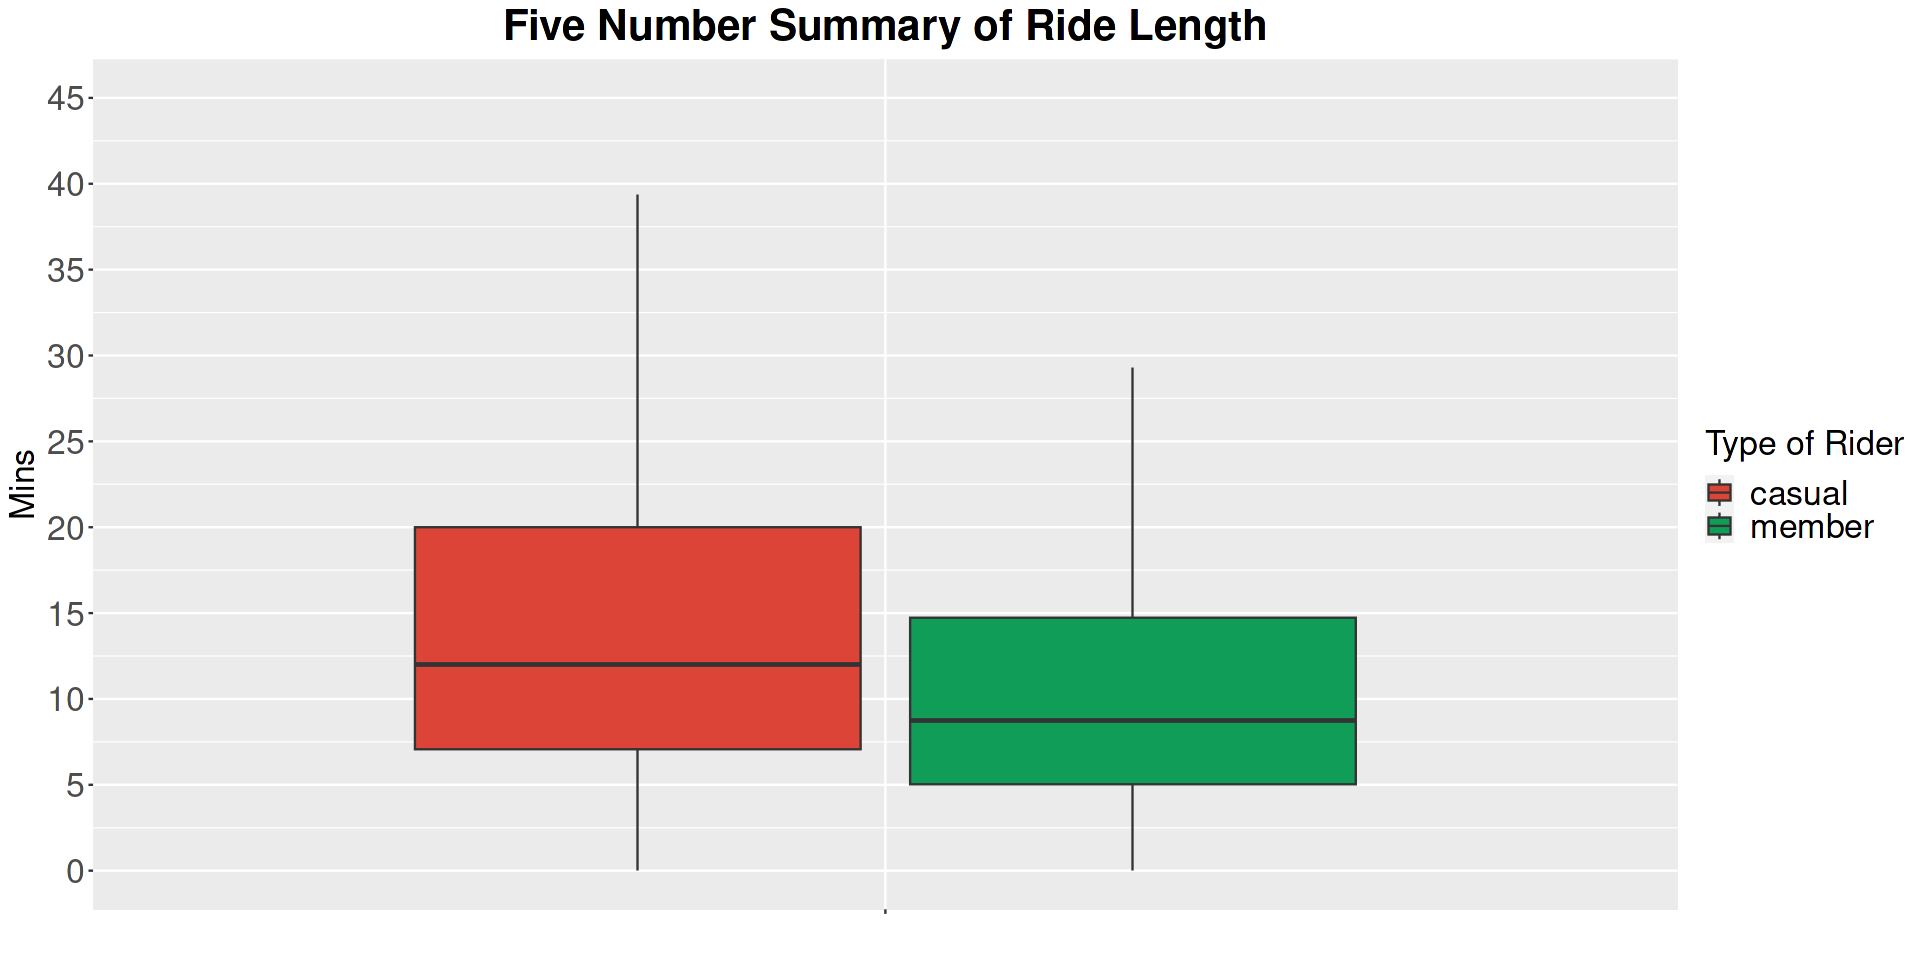

In [25]:
options(repr.plot.width=16, repr.plot.height=8)

paste('Five number summary of ride length (Members)')
summary(data%>%filter(member_casual=='member'))[1:6,'ride_length_mins']

paste('Five number summary of ride length (Casuals)')
summary(data%>%filter(member_casual=='casual'))[1:6,'ride_length_mins']

# Boxplots
ggplot(data, aes(y=ride_length_mins, x='', fill=member_casual)) +
geom_boxplot(outlier.shape=NA) +
scale_y_continuous(name='Mins', breaks=seq(0, 45, 5), limits=c(0, 45)) +
theme +
theme(axis.title.x=element_blank()) + 
ggtitle('Five Number Summary of Ride Length') +
scale_fill_manual("Type of Rider", values=colors(1, 0, 1, 0))

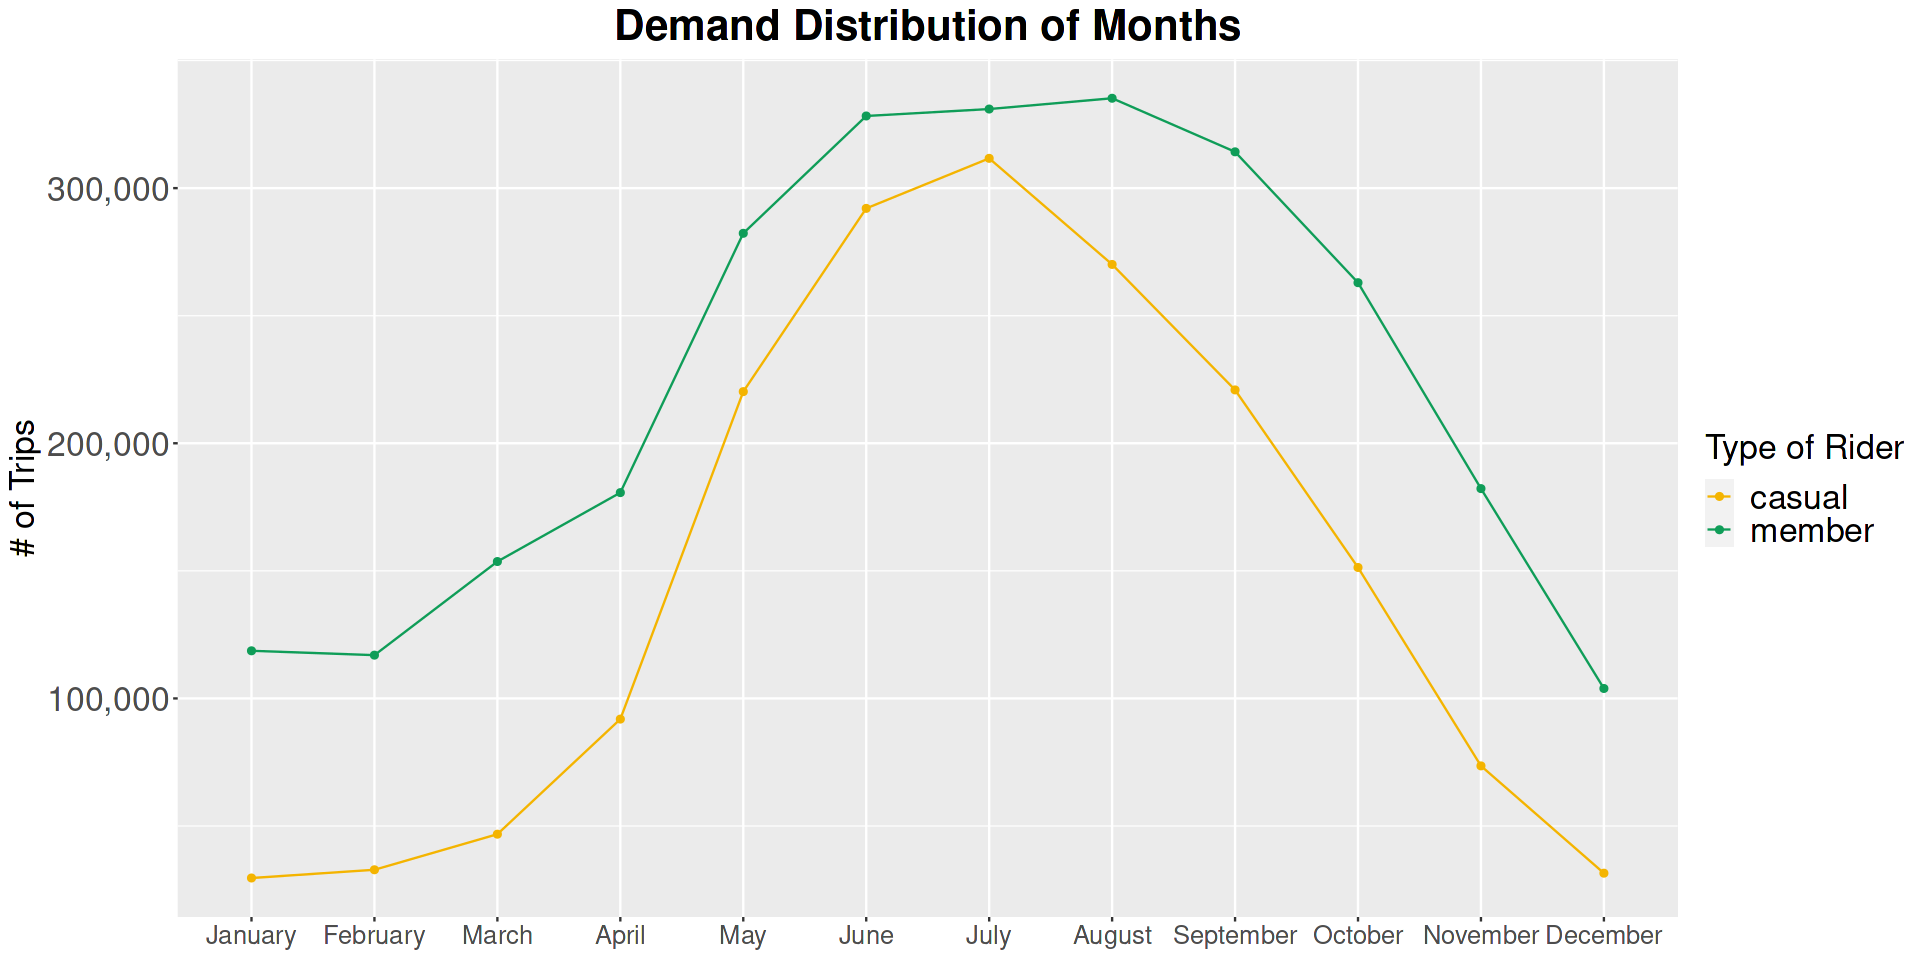

In [26]:
# Line Chart with Points
temp = data %>% 
group_by(member_casual, month) %>%
summarise(.groups='drop', count = n())

ggplot(temp, aes(group=member_casual, x=month, y=count)) +
geom_line(aes(color=member_casual)) + 
geom_point(aes(color=member_casual)) + 
theme + 
theme(axis.text.x=element_text(size=15), axis.title.x=element_blank()) + 
scale_y_continuous(name='# of Trips', labels=comma) + 
scale_color_manual('Type of Rider', values=colors(0, 1, 1, 0)) + 
ggtitle('Demand Distribution of Months')

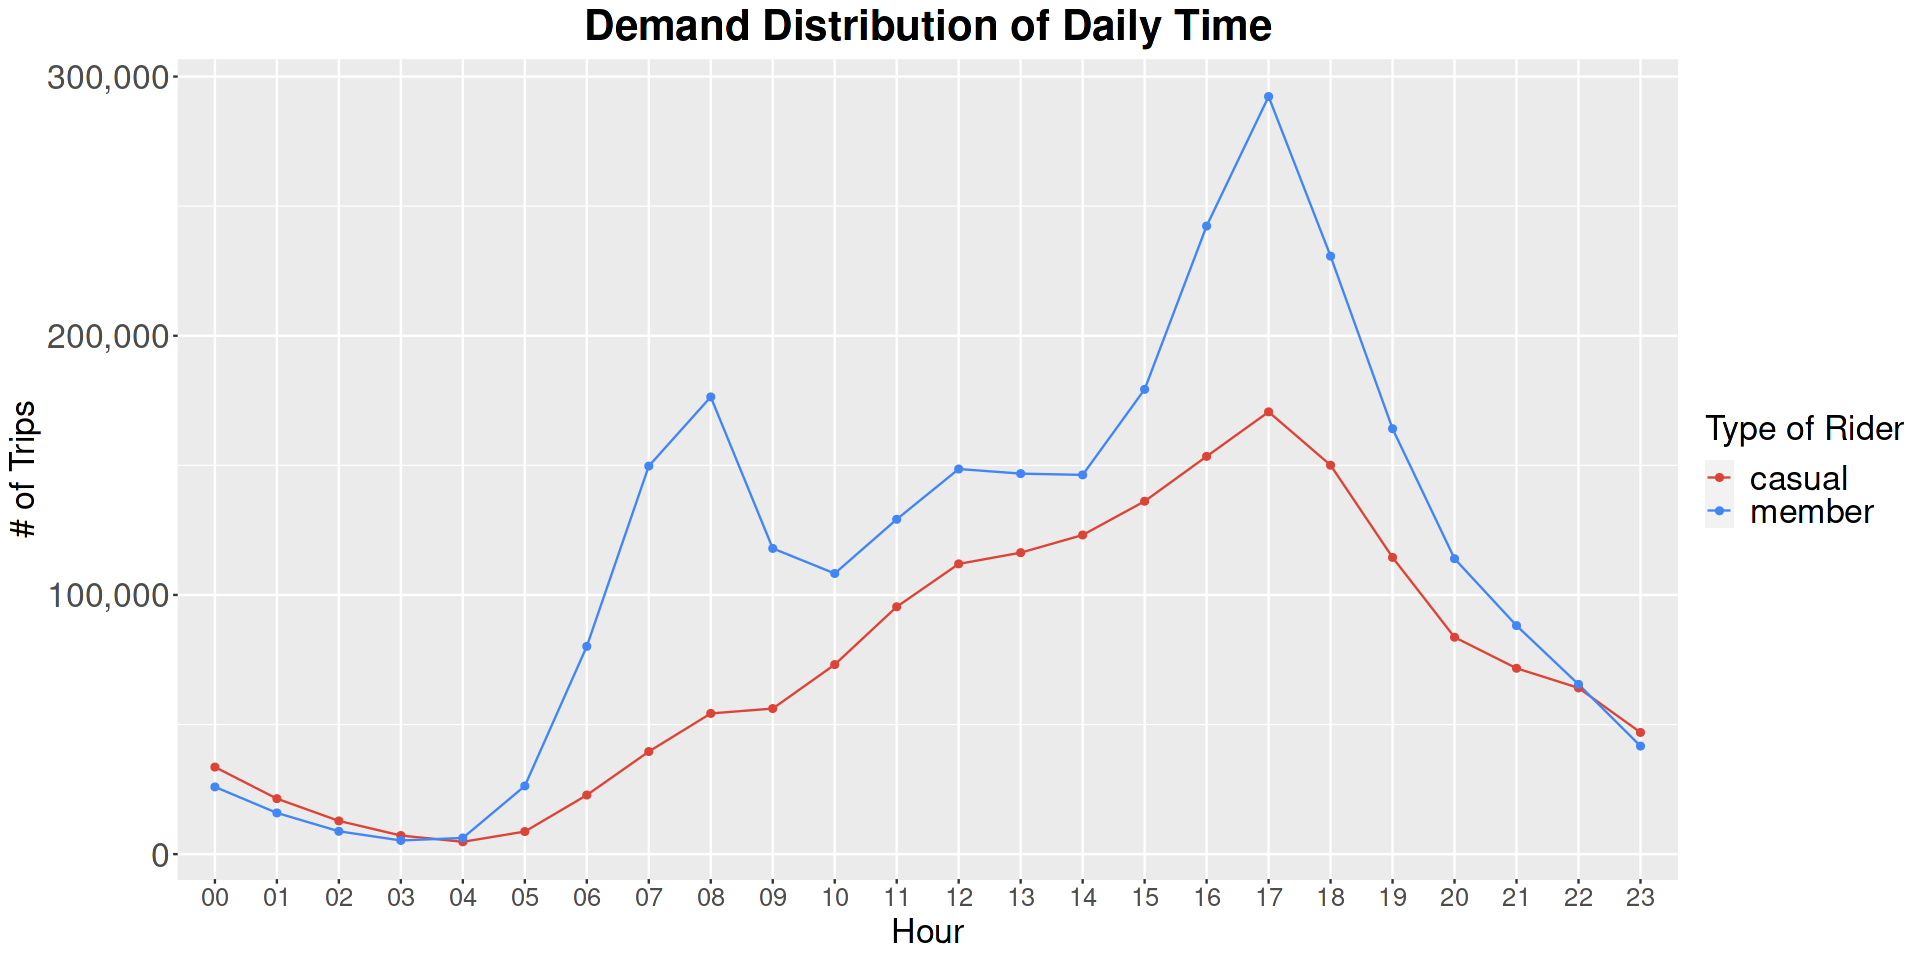

In [27]:
temp = data %>% group_by(member_casual, time) %>% summarise(.groups='drop', count = n())
ggplot(temp, aes(group=member_casual, x=time, y=count)) +
geom_line(aes(color=member_casual)) + 
geom_point(aes(color=member_casual)) + 
theme + 
theme(axis.text.x=element_text(size=15)) + 
xlab('Hour') +
scale_y_continuous(name='# of Trips', labels=comma) + 
scale_color_manual('Type of Rider', values=colors(1, 0, 0, 1)) + 
ggtitle('Demand Distribution of Daily Time')

# Share

Now that I have performed my analysis and gained some insights into the data, I'll create visualizations to share my 
ﬁndings. Mr.Moreno has reminded me that they should be sophisticated and polished in order to eﬀectively communicate to the 
executive team.

In [28]:
# Export the prepared data to use it in tableau for creating a dashboard
#write.csv(data, 'cleaned_data.csv')

### Cylistics Dashboard | Segmentation Analysis ([Click Here](https://public.tableau.com/app/profile/mohammed.mustafa.mahomud/viz/Google-Data-Analytics-Capstone-Project/Cyclistic))

### Presentation ([Cilck Here](https://github.com/mohammed112025/Data-Science/tree/main/Google-Data-Analytics-Capstone-Project))

# Act (Recommendations)

##### Based on the key findings, the following recommendations are made:
Offer special promotions and discounts to casual riders to encourage them to become annual members. Create targeted marketing campaigns that cater to the different usage patterns of casual riders and annual members. Expand the bike-share service to areas with high commuting traffic to attract more annual members.

## Conclusion

In conclusion, this project provides compelling data insights and visualizations that support the development of a new marketing strategy for Cyclistic. By understanding the differences between casual riders and annual members, Cyclistic can better target its marketing efforts and increase its number of annual memberships.